# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch.csv',low_memory=False)

In [3]:
#Convert column with mixed types to object type.

ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]] = ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]].astype(object)
g = ch_df.columns.to_series().groupby(ch_df.dtypes).groups
g

{dtype('int64'): Index(['Unnamed: 0', 'HH1', 'HH2', 'LN', 'UF1', 'UF2', 'UF4', 'UF6', 'UF7',
        'UF8D', 'UF8M', 'UF8Y', 'UF9', 'UF10', 'UF11', 'HH6', 'HH7', 'HL4',
        'CDOI', 'melevel', 'religion', 'zone', 'windex5', 'PSU', 'stratum'],
       dtype='object'),
 dtype('float64'): Index(['UF12H', 'UF12M', 'UF13H', 'UF13M', 'AG1D', 'AG1M', 'AG1Y', 'AG2',
        'BR1', 'BR2',
        ...
        'TN12_4', 'ED4A', 'ED4B', 'CDOB', 'CAGE', 'CAGE_6', 'CAGE_11', 'CAGED',
        'chweight', 'wscore'],
       dtype='object', length=184),
 dtype('O'): Index(['EC7AA', 'EC7AB', 'EC7AX', 'EC7AY', 'EC7BA', 'EC7BB', 'EC7BX', 'EC7BY',
        'EC7CA', 'EC7CB', 'EC7CX', 'EC7CY', 'EC7DA', 'EC7DB', 'EC7DX', 'EC7DY',
        'EC7EA', 'EC7EB', 'EC7EX', 'EC7EY', 'EC7FA', 'EC7FB', 'EC7FX', 'EC7FY',
        'CA6A', 'CA6B', 'CA6C', 'CA6G', 'CA6H', 'CA6L', 'CA6M', 'CA6N', 'CA6O',
        'CA6Q', 'CA6X', 'CA11A', 'CA11B', 'CA11C', 'CA11D', 'CA11E', 'CA11H',
        'CA11I', 'CA11J', 'CA11K', 'CA11L', 'C

In [4]:
ch_df.describe()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
count,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,...,25192.000000,25192.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000
mean,13009.500000,765.843147,10.391959,6.122108,765.843147,10.391959,6.122108,2.889423,11.521255,14.596164,...,2.987496,984.930970,1.822815,1.581098,3.112845,0.968253,-0.107336,2.519217,765.843147,19.632601
std,7510.893988,429.034000,5.756146,3.017196,429.034000,5.756146,3.017196,2.431748,2.895621,7.412582,...,1.427527,1017.925784,0.879074,0.568260,1.603637,1.050827,0.968301,1.414660,429.034000,10.722314
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.574326,0.000000,1.000000,1.000000
25%,6505.250000,394.000000,5.000000,4.000000,394.000000,5.000000,4.000000,2.000000,9.000000,9.000000,...,2.000000,417.000000,1.000000,1.000000,2.000000,0.430426,-0.950428,1.000000,394.000000,10.000000
50%,13009.500000,764.000000,10.000000,5.000000,764.000000,10.000000,5.000000,2.000000,12.000000,15.000000,...,3.000000,909.000000,2.000000,2.000000,3.000000,0.677064,-0.260526,2.000000,764.000000,20.000000
75%,19513.750000,1138.000000,15.000000,7.000000,1138.000000,15.000000,7.000000,2.000000,14.000000,21.000000,...,4.000000,1384.000000,3.000000,2.000000,4.000000,1.161744,0.639379,4.000000,1138.000000,29.000000
max,26018.000000,1480.000000,20.000000,41.000000,1480.000000,20.000000,41.000000,39.000000,18.000000,30.000000,...,5.000000,9999.000000,9.000000,9.000000,6.000000,14.433318,3.008995,5.000000,1480.000000,37.000000


In [5]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
0,1,4,6,1,4,6,2,15,21,2,...,5.0,1656.0,3,1,4,1.262202,1.653178,5,1,1
1,1,5,5,1,5,5,2,12,21,2,...,3.0,1031.0,2,1,4,1.262202,1.973658,5,1,1
2,1,5,6,1,5,6,2,12,21,2,...,4.0,1320.0,2,1,4,1.262202,1.973658,5,1,1
3,1,6,3,1,6,3,2,11,21,2,...,1.0,164.0,3,1,4,1.262202,1.964425,5,1,1
4,1,7,4,1,7,4,2,16,21,2,...,4.0,1162.0,3,1,4,1.262202,1.638443,5,1,1


In [6]:
wm_df = pd.read_csv('wm.csv', low_memory = False)

In [7]:
wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]] = wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]].astype(object)
g = wm_df.columns.to_series().groupby(wm_df.dtypes).groups
g

{dtype('int64'): Index(['Unnamed: 0', 'HH1', 'HH2', 'LN', 'WM1', 'WM2', 'WM4', 'WM5', 'WM6D',
        'WM6M', 'WM6Y', 'WM7', 'WM8', 'WM9', 'HH6', 'HH7', 'WDOI', 'religion',
        'zone', 'windex5', 'PSU', 'stratum'],
       dtype='object'),
 dtype('float64'): Index(['WM10H', 'WM10M', 'WM11H', 'WM11M', 'WB1M', 'WB1Y', 'WB2', 'WB3', 'WB4',
        'WB5',
        ...
        'WAGEM', 'WDOBFC', 'WDOBLC', 'MSTATUS', 'CEB', 'CSURV', 'CDEAD',
        'welevel', 'wmweight', 'wscore'],
       dtype='object', length=165),
 dtype('O'): Index(['CM13', 'MN2A', 'MN2B', 'MN2C', 'MN2F', 'MN2G', 'MN2X', 'MN14A',
        'MN14B', 'MN14C', 'MN14D', 'MN14E', 'MN14H', 'MN14X', 'MN14Z', 'MN17A',
        'MN17B', 'MN17C', 'MN17F', 'MN17G', 'MN17H', 'MN17X', 'MN17Y', 'MN27A',
        'MN27B', 'MN27C', 'MN27D', 'MN27E', 'MN27F', 'MN27G', 'MN27H', 'MN27I',
        'MN27X', 'IS2A', 'IS2B', 'IS2C', 'IS2D', 'IS2E', 'IS2F', 'IS2G', 'IS2X',
        'IS2Y', 'IS2Z', 'CP3A', 'CP3B', 'CP3C', 'CP3D', 'CP3E', 'CP3F', 'C

In [8]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CSURV,CDEAD,welevel,religion,zone,wmweight,wscore,windex5,PSU,stratum
0,1,1,3,1,1,3,16,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.580774,5,1,1
1,1,2,2,1,2,2,7,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.355768,5,1,1
2,1,3,2,1,3,2,7,21,2,2011,...,0.0,0.0,3.0,1,4,1.199659,1.351060,5,1,1
3,1,4,2,1,4,2,16,21,2,2011,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
4,1,6,2,1,6,2,11,21,2,2011,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1


In [9]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [10]:
ch_wm_df = ch_wm_df[ch_wm_df.columns.drop(list(ch_wm_df.filter(regex='_y')))]

In [11]:
ch_wm_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,WDOM,WAGEM,WDOBFC,WDOBLC,MSTATUS,CEB,CSURV,CDEAD,welevel,wmweight
0,1,4,6,1,4,6,2,15,21,2,...,1204.0,27.0,1222.0,1280.0,1.0,4.0,4.0,0.0,3.0,1.199659
1,1,6,3,1,6,3,2,11,21,2,...,1307.0,29.0,1329.0,1329.0,1.0,2.0,1.0,1.0,3.0,1.199659
2,1,7,4,1,7,4,2,16,21,2,...,1201.0,22.0,1236.0,1320.0,1.0,3.0,3.0,0.0,3.0,1.199659
3,1,7,5,1,7,5,2,16,21,2,...,1201.0,22.0,1236.0,1320.0,1.0,3.0,3.0,0.0,3.0,1.199659
4,1,8,5,1,8,5,2,15,21,4,...,1220.0,26.0,1229.0,1289.0,1.0,3.0,3.0,0.0,3.0,1.199659


In [12]:
hh_df = pd.read_csv('hh.csv', low_memory = False)

In [13]:
hh_df.iloc[:,[36,41]] = hh_df.iloc[:,[36,41]].astype(object)
g = hh_df.columns.to_series().groupby(hh_df.dtypes).groups
g

{dtype('int64'): Index(['Unnamed: 0', 'HH1', 'HH2', 'HH3', 'HH4', 'HH5D', 'HH5M', 'HH5Y', 'HH6',
        'HH7', 'HH9', 'HH16', 'HH17', 'zone', 'windex5', 'PSU', 'stratum'],
       dtype='object'),
 dtype('float64'): Index(['HH10', 'HH11', 'HH12', 'HH13', 'HH14', 'HH15', 'HH18H', 'HH18M',
        'HH19H', 'HH19M', 'WS1', 'WS2', 'WS3', 'WS4', 'WS4AA', 'WS4AB', 'WS4B',
        'WS5', 'WS6', 'WS8', 'WS9', 'WS10', 'WS11', 'HC1A', 'HC1B', 'HC1C',
        'HC2', 'HC3', 'HC4', 'HC5', 'HC6', 'HC7', 'HC8A', 'HC8B', 'HC8C',
        'HC8D', 'HC8E', 'HC8F', 'HC8G', 'HC8H', 'HC8I', 'HC8J', 'HC8K', 'HC8L',
        'HC8M', 'HC8N', 'HC8O', 'HC9A', 'HC9B', 'HC9C', 'HC9D', 'HC9E', 'HC9F',
        'HC9G', 'HC10', 'HC11', 'HC12', 'HC13', 'HC14A', 'HC14B', 'HC14C',
        'HC14D', 'HC14E', 'HC14F', 'HC14G', 'HC14H', 'HC14I', 'HC15', 'TN1',
        'TN2', 'CD6', 'CD8', 'CD9', 'CD_FLAG', 'CD11', 'CD12', 'CD13', 'CD14',
        'CD15', 'CD16', 'CD17', 'CD18', 'CD19', 'CD20', 'CD21', 'CD22', 'HW1',
        'HW

In [14]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH9,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,1,16,2,4,3,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.580774,5,1,1
1,1,2,7,2,4,3,2011,1,1,1,...,3.0,2.0,1.0,4,1.0,1.250765,1.355768,5,1,1
2,1,3,7,2,21,2,2011,1,1,1,...,3.0,2.0,1.0,4,2.0,1.250765,1.351060,5,1,1
3,1,4,15,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
4,1,5,12,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,2.0,1.250765,1.973658,5,1,1


In [15]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [16]:
df = df[df.columns.drop(list(df.filter(regex='_y')))]

In [17]:
df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,HW4,HW5A,HW5B,HW5C,HW5D,HW5Y,SI1,HHSEX,helevel,hhweight
0,1,4,6,1,4,6,2,15,21,2,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
1,1,6,3,1,6,3,2,11,21,2,...,1.0,NaN,B,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
2,1,7,4,1,7,4,2,16,21,2,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
3,1,7,5,1,7,5,2,16,21,2,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
4,1,8,5,1,8,5,2,15,21,4,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.250765


Remove ID columns

In [18]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [19]:
df['IM1'].unique()

array([ 1.,  2.,  3., nan,  9.])

In [20]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['has_card'] = np.where(df['IM1'] == 1, 1,0)

In [21]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

In [22]:
df = df.fillna(0)

In [23]:
target = df['has_card']
target.unique()

array([1, 0], dtype=int64)

In [24]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

y=['has_card']
df_vars =df.columns.values.tolist()
X=[i for i in df_vars]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df[X],df[y].values.ravel(), test_size=0.3, random_state=0)

# Handling data imbalance by downsampling the minority class in Training data

In [26]:
df_majority = X_train[X_train.has_card == 0]
df_minority = X_train[X_train.has_card == 1]

print(len(df_majority))
print(len(df_minority))

min_class_len = len(df_minority)

22592
5387


In [27]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=min_class_len,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.has_card.value_counts()

1    5387
0    5387
Name: has_card, dtype: int64

In [28]:
X_train = df_downsampled
len(X_train)

10774

In [29]:
y_train = df.iloc[X_train.index.tolist(),:]
y_train = y_train['has_card']

In [30]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='has_card')))]

In [31]:
#One hot encoding of categorical values using get_dummies function

X_train = pd.get_dummies(X_train)
X_train.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR2,BR3,BR3A,BR4,EC1,...,HW5A_0,HW5A_A,HW5B_0,HW5B_B,HW5C_0,HW5C_C,HW5D_0,HW5D_D,HW5Y_0,HW5Y_Y
23867,15.0,5.0,2009.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
10218,16.0,12.0,2009.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
11774,14.0,8.0,2010.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,...,0,1,0,1,1,0,1,0,1,0
249,16.0,7.0,2010.0,0.0,3.0,2.0,1.0,0.0,6.0,0.0,...,1,0,1,0,1,0,1,0,1,0
39342,5.0,5.0,2009.0,1.0,3.0,2.0,2.0,0.0,4.0,0.0,...,1,0,1,0,1,0,1,0,1,0


1	Yes	    - 6021   
2	No	    - 1279  
8	DK	    - 102	  
9	Missing - 3

# Logistic Regression Classifier

In [32]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [34]:
len(feature_importance)

841

In [35]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [36]:
people = people[0:50] 
score = score[0:50] 
x_pos = np.arange(len(people)) 

In [37]:
# Read the Labels File into a df
labels_df = pd.read_csv('label_nig.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [38]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,BR1,0.188815
1,MN5,0.160436
2,religion,0.088954
3,ED4A,0.070782
4,HC1A,0.069572
5,HAZ,0.065852
6,helevel,0.063673
7,MN7,0.062249
8,WS3,0.061626
9,HC14G,0.060428


In [39]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_LR_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,BR1,0.188815,Birth certificate
1,MN5,0.160436,NaN
2,religion,0.088954,NaN
3,ED4A,0.070782,NaN
4,HC1A,0.069572,Religion of household head
5,HAZ,0.065852,Height for age z-score NCHS
6,helevel,0.063673,Education of household head
7,MN7,0.062249,NaN
8,WS3,0.061626,Location of the water source
9,HC14G,0.060428,NaN


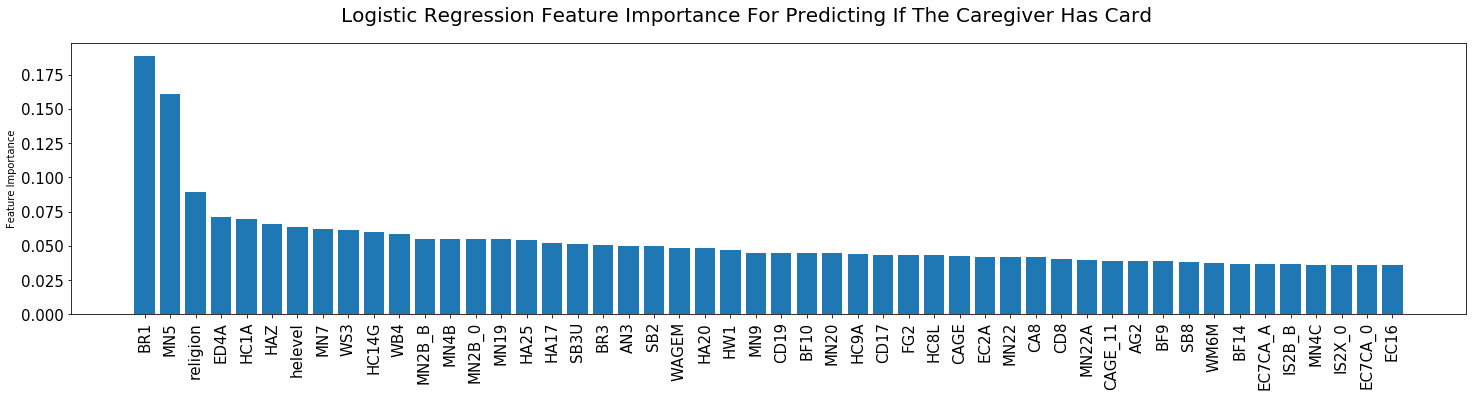

In [40]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [41]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [42]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.69      0.80      9697
          1       0.39      0.83      0.53      2295

avg / total       0.84      0.72      0.75     11992



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [43]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.75


In [45]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.79      0.84      9697
          1       0.40      0.60      0.48      2295

avg / total       0.80      0.75      0.77     11992



Let's validate the results of Random Forests Model with kfold cross validation

In [46]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.753


In [47]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [48]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [49]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,AG1D,0.041147
1,HC1C,0.037681
2,helevel,0.017488
3,CDOB,0.016319
4,ED4B,0.013972
5,WB3,0.013067
6,CAGED,0.012221
7,wscore,0.012093
8,HC14D,0.010866
9,MN18,0.009651


In [50]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_RF_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,AG1D,0.041147,Day of birth of child
1,HC1C,0.037681,NaN
2,helevel,0.017488,Education of household head
3,CDOB,0.016319,Date of birth of child (CMC)
4,ED4B,0.013972,Highest grade completed at that level
5,WB3,0.013067,NaN
6,CAGED,0.012221,Age in days
7,wscore,0.012093,Combined wealth score
8,HC14D,0.010866,Sheep
9,MN18,0.009651,NaN


In [51]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

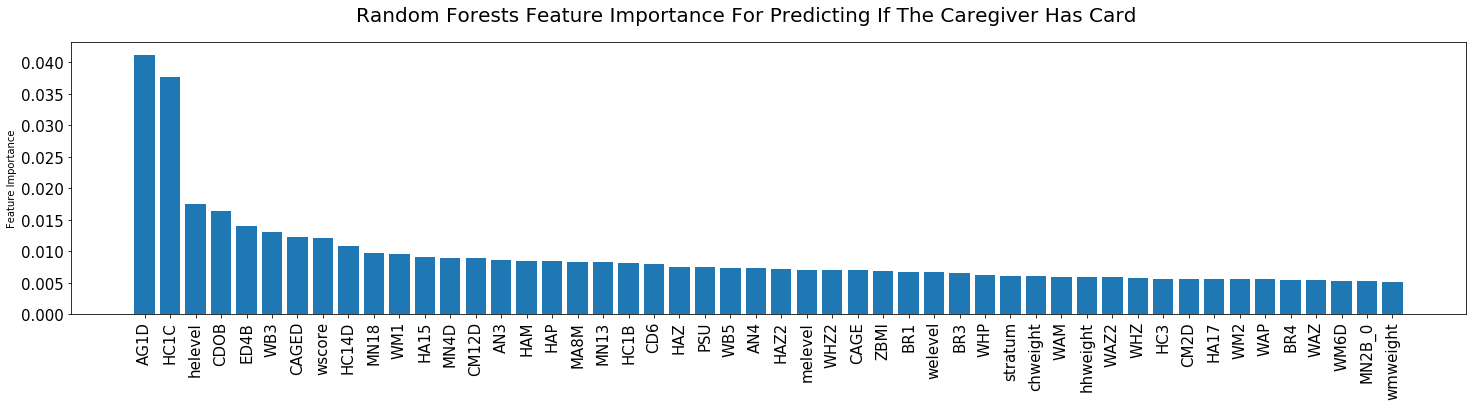

In [52]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

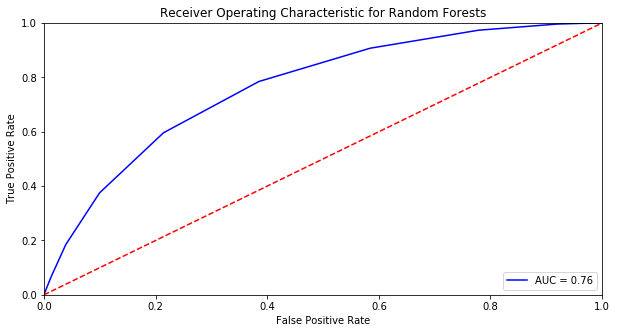

In [53]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [54]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [55]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.83


In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.747


In [57]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [58]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [59]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:100], columns=['name','Score'])
features_df

,name,Score
0,CDOB,0.051903
1,AG1D,0.048598
2,CAGED,0.037341
3,BR1,0.035639
4,MN5,0.027825
5,ED4B,0.025314
6,HC1B,0.024214
7,HAM,0.022146
8,HC1C,0.019855
9,WM1,0.018251


In [60]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_GB_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,CDOB,0.051903,Date of birth of child (CMC)
1,AG1D,0.048598,Day of birth of child
2,CAGED,0.037341,Age in days
3,BR1,0.035639,Birth certificate
4,MN5,0.027825,NaN
5,ED4B,0.025314,Highest grade completed at that level
6,HC1B,0.024214,Mother tongue of household head
7,HAM,0.022146,Height for age percent of reference median NCHS
8,HC1C,0.019855,NaN
9,WM1,0.018251,NaN


In [61]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [62]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.86      0.89      9697
          1       0.54      0.67      0.60      2295

avg / total       0.85      0.83      0.83     11992



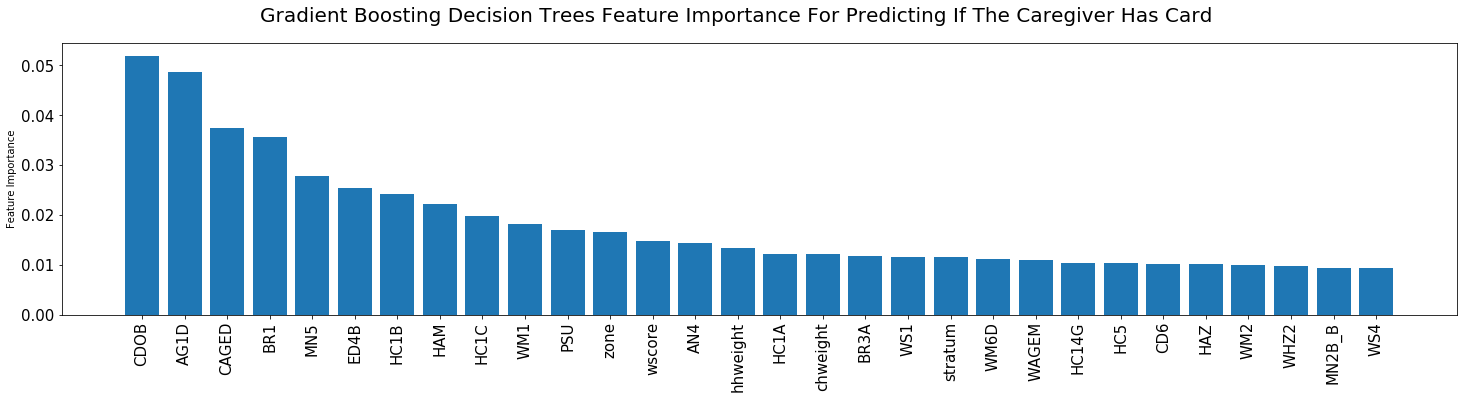

In [63]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

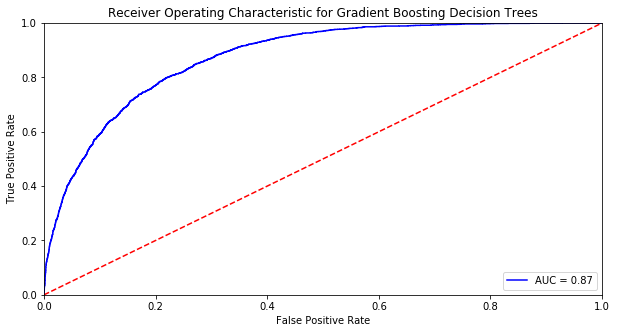

In [64]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gbd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Gradient Boosting Decision Trees')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
print(final_df.head())
nan_df = final_df[final_df.label.isnull()]
len(nan_df)

    name     Score                         label
0   CDOB  0.051903  Date of birth of child (CMC)
1   AG1D  0.048598         Day of birth of child
2  CAGED  0.037341                   Age in days
3    BR1  0.035639             Birth certificate
4    MN5  0.027825                           NaN


50

In [66]:
f_name_lst = list(nan_df.name)

In [67]:
final_df = final_df[~final_df['name'].isin(f_name_lst)]

In [68]:
final_df.sort_values('Score')

,name,Score,label
99,HC14A,0.002486,"Cattle, milk cows, buffaloes or bulls"
98,TN6,0.002524,Months ago net obtained
96,SI1,0.002608,Salt iodization test outcome
94,HC4,0.002655,Main material of roof
88,WHM,0.002821,Weight for height percent of reference median ...
84,EC17,0.002886,Child gets distracted easily
81,WS10,0.002949,Toilet shared with other household or with gen...
80,TN12_4,0.002990,Person 4 who slept under net
79,WS6,0.003071,Treat water to make safer for drinking
75,HW1,0.003385,Place where household members most often wash ...


In [69]:
selected_features = list(final_df.name)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [70]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [72]:
feature_importance = (logreg.coef_[0])
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [73]:
col_list = list(X_train.columns[sorted_idx])
label_list = []
for i in col_list:
    label_row = final_df[final_df['name'] == i]
    label_list.append(list(label_row.label))

label_list = [''.join(x) for x in label_list]
print(label_list)

['Household sample weight', 'Birth certificate', 'Religion of household head', 'Treat water to make safer for drinking', 'Stratum', 'Child had diarrhoea in last 2 weeks', 'Sheep', 'Place where household members most often wash their hands', 'Person collecting water', 'Child gets distracted easily', "Child's weight (kilograms)", 'Boat', 'Day of birth of child', 'Type of fuel using for cooking', 'Salt iodization test outcome', 'Weight for height z-score WHO', 'Height for age percentile NCHS', 'Main material of exterior wall', 'Height for age percent of reference median NCHS', 'Main material of roof', 'Weight for height percent of reference median NCHS', 'Months ago net obtained', 'Person 4 who slept under net', 'Age in days', 'Time (in minutes) to get water and come back', 'Height for age z-score WHO', 'Cattle, milk cows, buffaloes or bulls', "Child's length or height (centimetres)", 'Acres of agricultural land members of household owns', 'Toilet shared with other household or with gener

In [74]:
result_df = pd.DataFrame({'Feature': label_list ,'Coefficient': feature_importance[sorted_idx],'Column' :col_list})
result_df.head()

,Coefficient,Column,Feature
0,-1.081143,hhweight,Household sample weight
1,-0.826700,BR1,Birth certificate
2,-0.268181,HC1A,Religion of household head
3,-0.135739,WS6,Treat water to make safer for drinking
4,-0.134054,stratum,Stratum


In [75]:
result_df.to_csv('result_Nigeria.csv')

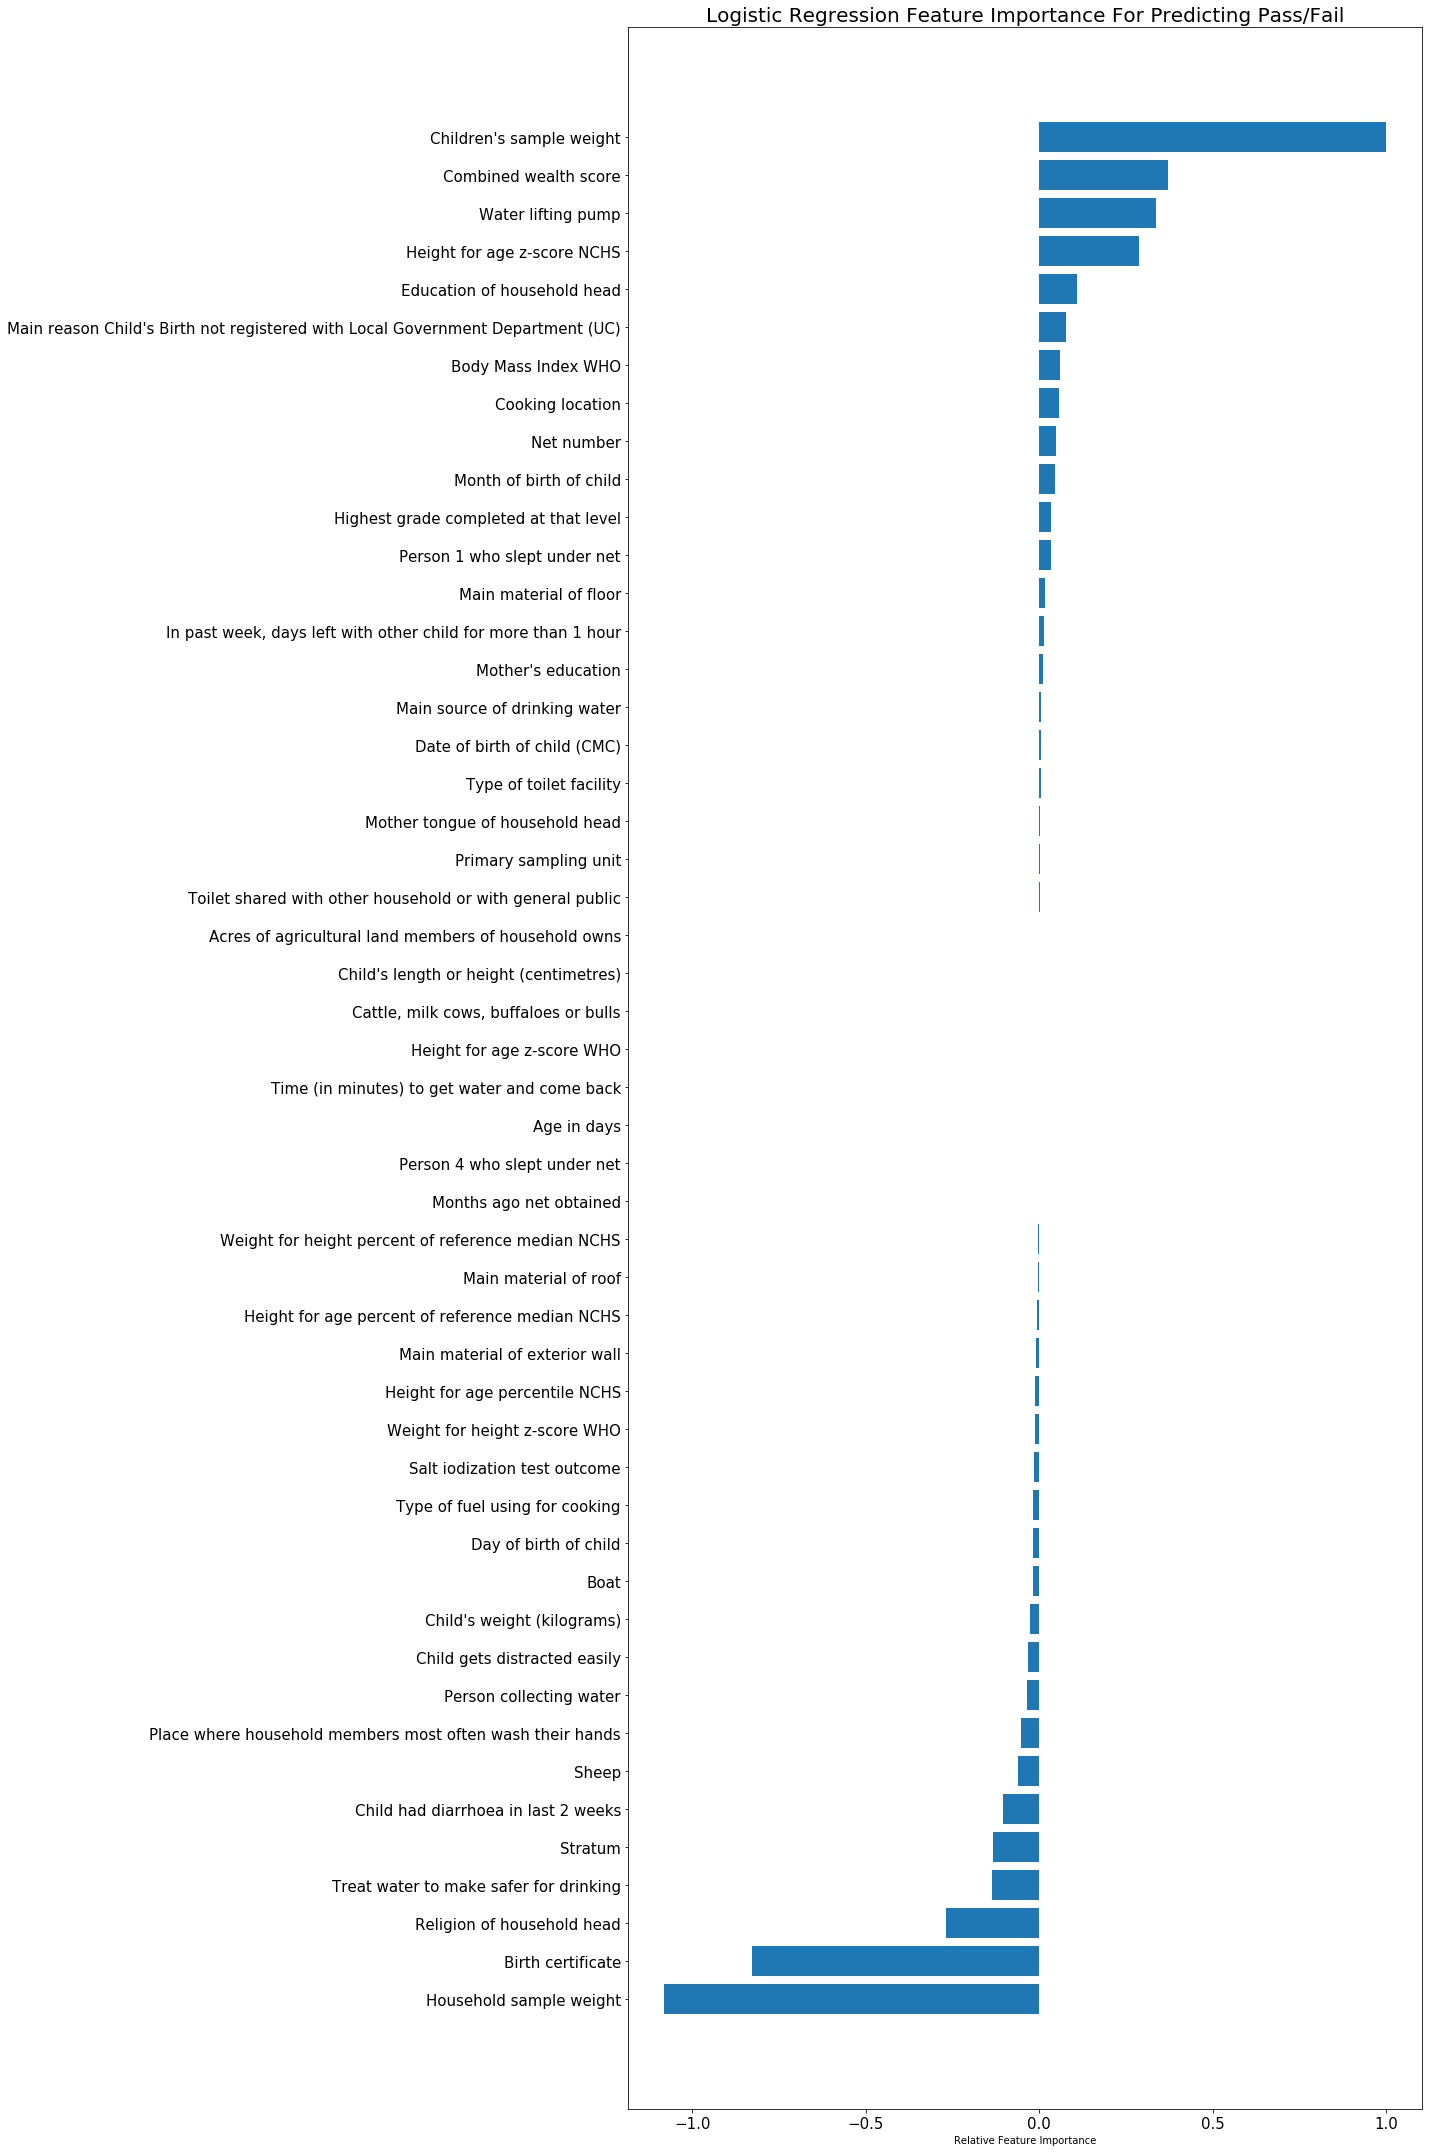

In [76]:
featfig = plt.figure(figsize=(20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(label_list, fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title('Logistic Regression Feature Importance For Predicting Pass/Fail', fontsize=20)
plt.tight_layout()   
plt.show()